In [41]:
import pandas as pd
import numpy as np
from scipy import integrate
import matplotlib.pyplot as plt

In [40]:
%matplotlib inline

In [21]:

mu = 1 / (12 * 30)
delta_A = 1 / 4
delta_C = 1 / 116
x = 1 / 12
y = 0
r_b = 0.8 / 0.2
lambda_H = 43.478; lambda_L = 5.4896
beta_A = 0.015; beta_C = 0.001
rho_H = 0.041667; rho_L = 0.0046296
pi = 0.5

In [22]:
def HIV(t, X):
    
    # ODE
    dX = np.zeros((len(X), 1))    # a column vector
    
    # State variables
    # S_H = X(1); S_L = X(2); I_AH = X(3); I_AL = X(4); I_CH = X(5);
    # I_CL = X(6);
    S_H, S_L, I_AH, I_AL, I_CH, I_CL = X

    # auxiliary variables
    N_H = S_H + I_AH + I_CH
    N_L = S_L + I_AL + I_CL
    N = N_H + N_L
    
    
    alpha = mu * N + delta_C * (I_CH + I_CL)
    alpha_H = 0.9 * alpha
    alpha_L = 0.1 * alpha

    theta = lambda_H * N_H + lambda_L * N_L
    
    sigma = (beta_A * (lambda_H * I_AH + lambda_L * I_AL) + beta_C * (lambda_H * I_CH + lambda_L * I_CL)) / theta
    
    psi_H = pi * lambda_H * (beta_A * I_AH / N_H + beta_C * I_CH / N_H)
    psi_L = pi * lambda_L * (beta_A * I_AL / N_L + beta_C * I_CL / N_L)
    
    tau_H = (1 - pi) * lambda_H * sigma
    tau_L = (1 - pi) * lambda_L * sigma

    phi_H = psi_H + tau_H; phi_L = psi_L + tau_L

    # -----------------------------------------------
    dS_H = alpha_H - (phi_H + rho_H + mu) * S_H + rho_L * S_L
    dS_L = alpha_L - (phi_L + rho_L + mu) * S_L + rho_H * S_H

    dI_AH = phi_H * S_H - (rho_H + mu + delta_A) * I_AH + rho_L * I_AL
    dI_AL = phi_L * S_L - (rho_L + mu + delta_A) * I_AL + rho_H * I_AH

    dI_CH = delta_A * I_AH - (rho_H + mu + delta_C) * I_CH + rho_L * I_CL
    dI_CL = delta_A * I_AL - (rho_L + mu + delta_C) * I_CL + rho_H * I_CH

    dX = np.array([dS_H, dS_L, dI_AH, dI_AL, dI_CH, dI_CL])
    return dX

In [23]:
#====== Computing uncontrolled solution ========================
r = integrate.ode(HIV).set_integrator(
    "dopri5",
    atol=1e-8,
    rtol=1e-4,
)
# we skip the system's dynamics during the initial period
# we consider 300 months long interval = 25 years

X0 = np.array([10000, 89998, 1, 1, 0, 0])

T0 = 0
T1 = 300
dt = 1
X = []
#[0 300], 300 points
#for any step
# t = np.linspace(T0, T1, T1 // dt)
#if step is 1
t = np.array(list((i for i in range(T0, T1 + 1))))


r.set_initial_value(X0, T0)
for ti in t:
    X.append(r.integrate(ti))
    
T = np.array(t)
X = np.array(X)
data = pd.DataFrame(X, columns=['S_H', 'S_L', 'I_AH', 'I_AL', 'I_CH', 'I_CL'],)
data['T'] = T
data

/opt/conda/lib/python3.6/site-packages/scipy/integrate/_ode.py:1035: UserWarning: dopri5: step size becomes too small
  self.messages.get(idid, 'Unexpected idid=%s' % idid))


,S_H,S_L,I_AH,I_AL,I_CH,I_CL,T
0,10000.000000,89998.000000,1.000000,1.000000,0.000000,0.000000,0
1,10216.297975,89780.894986,1.234980,1.042420,0.271787,0.257852,1
2,10422.099751,89574.100784,1.533379,1.130663,0.595429,0.539995,2
3,10617.870125,89377.100414,1.912755,1.270317,0.985898,0.860491,3
4,10804.041213,89189.395690,2.395491,1.469706,1.462303,1.235597,4
5,10981.011104,89010.504645,3.010160,1.740403,2.049027,1.684661,5
6,11149.141762,88839.958630,3.793271,2.097945,2.777179,2.231212,6
7,11308.755986,88677.298974,4.791498,2.562774,3.686466,2.904303,7
8,11460.133183,88522.073057,6.064526,3.161464,4.827584,3.740186,8
9,11603.503650,88373.829635,7.688687,3.928310,6.265292,4.784427,9


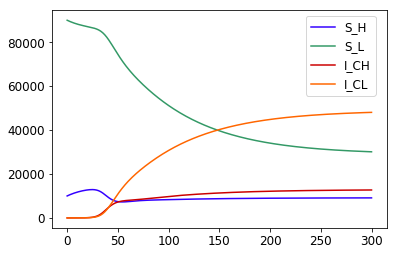

In [85]:

plt.plot(T, data.S_H.values+data.I_AH.values, '#3300FF', label='S_H')
plt.plot(T, data.S_L.values+data.I_AL.values, '#339966', label='S_L')
plt.plot(T, data.I_CH.values, '#CC0000', label='I_CH')
plt.plot(T, data.I_CL.values, '#FF6600', label='I_CL')

mpl.rcParams.update({'font.size': 12})

data_names = ['S_H', 'S_L', 'I_CH', 'I_CL']
plt.legend(
    bbox_to_anchor = (0.74, 0.58, 0.25, 0.25),
    loc = 'lower left', labels = data_names )

In [25]:
# the states are:
# S_H, S_L -- high- and low-risk susceptibles,
# I_AH,I_AL -- high- and low-risk infected in acute phase
# we add S_H and I_AH (and the same for S_L and I_AL) as we cannot
# distinguish them.
# finally I_CH,I_CL -- high- and low-risk infected in chronical phase

N_H = data.S_H + data.I_AH + data.I_CH # number of all high-risk people
N_L = data.S_L + data.I_AL + data.I_CL # number of all low-risk people
N = N_H + N_L           # N = 100 000

# computing the respective fractions

# high-risk susceptibles
F_SH = (r_b*data.S_H).divide(r_b*N_H+N_L).multiply(N) + (r_b*data.I_AH).divide(r_b*N_H+N_L).multiply(N)
# low-risk susceptibles
F_SL = data.S_L.divide(r_b*N_H+N_L).multiply(N) + data.I_AL.divide(r_b*N_H+N_L).multiply(N)
# high-risk infected
F_ICH = r_b*data.I_CH.divide(r_b*N_H+N_L).multiply(N)
# low-risk infected
F_ICL = data.I_CL.divide(r_b*N_H+N_L).multiply(N)
data2 = pd.DataFrame(np.array([F_SH, F_SL, F_ICH, F_ICL]).transpose(), columns=['F_SH', 'F_SL', 'F_ICH', 'F_ICL'])

#ZZZ = F_SH + F_SL + F_ICH + F_ICL;






data2

,F_SH,F_SL,F_ICH,F_ICL
0,30771.597579,69228.402421,0.000000,0.000000
1,31281.334713,68717.635845,0.832087,0.197355
2,31761.773064,68236.001255,1.814328,0.411353
3,32214.764554,67781.592190,2.990688,0.652568
4,32642.002744,67352.647149,4.417044,0.933063
5,33045.033298,66947.535216,6.164425,1.267061
6,33425.262021,66564.743062,8.323185,1.671732
7,33783.960421,66202.863065,11.008343,2.168172
8,34122.268637,65860.582344,14.366413,2.782606
9,34441.195475,65536.672476,18.584149,3.547900


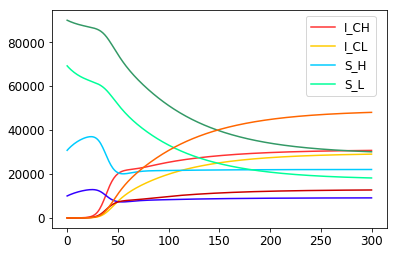

In [96]:
# Bayes-corrected fractions
plt.plot(T, data2.F_ICH.values, '#FF3333', label='F_ICH')
plt.plot(T, data2.F_ICL.values, '#FFCC00', label='F_ICL')
plt.plot(T, data2.F_SH.values, '#00CCFF', label='F_SH')
plt.plot(T, data2.F_SL.values, '#00FF99', label='F_SL')

mpl.rcParams.update({'font.size': 12})

data_names = ['I_CH', 'I_CL', 'S_H', 'S_L']
plt.legend(
    bbox_to_anchor = (0.74, 0.58, 0.25, 0.25),
    loc = 'lower left', labels = data_names )

# given fractions
plt.plot(T, data.S_H.values+data.I_AH.values, '#3300FF', label='S_H')
plt.plot(T, data.S_L.values+data.I_AL.values, '#339966', label='S_L')
plt.plot(T, data.I_CH.values, '#CC0000', label='I_CH')
plt.plot(T, data.I_CL.values, '#FF6600', label='I_CL')

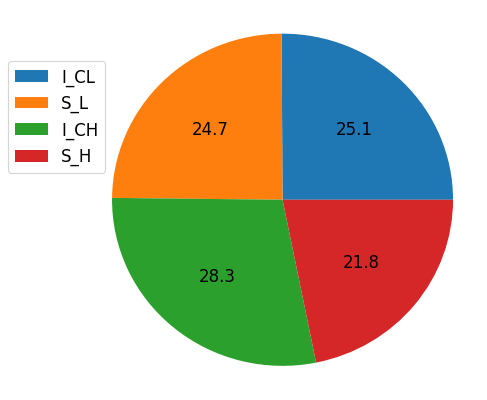

In [71]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime as dt
import csv

data_names = ['I_CL', 'S_L', 'I_CH', 'S_H']
data_values = [data2.F_ICL[150], data2.F_SL[150], data2.F_ICH[150], data2.F_SH[150],   ]

dpi = 80
fig = plt.figure(dpi = dpi, figsize = (500 / dpi, 500 / dpi) )
mpl.rcParams.update({'font.size': 15})

#plt.title('Распределение населения по результатам тестов')

xs = range(len(data_names))

plt.pie( 
    data_values, autopct='%.1f', radius = 1.1)
plt.legend(
    bbox_to_anchor = (-0.23, 0.55, 0.25, 0.25),
    loc = 'lower left', labels = data_names )



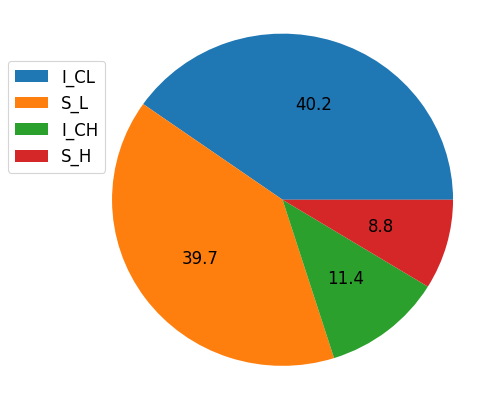

In [72]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime as dt
import csv

data_names = ['I_CL', 'S_L', 'I_CH', 'S_H']
data_values = [data.I_CL[150], data.S_L[150] + data.I_AL[150], data.I_CH[150], data.S_H[150] + data.I_AH[150]]

dpi = 80
fig = plt.figure(dpi = dpi, figsize = (500 / dpi, 500 / dpi) )
mpl.rcParams.update({'font.size': 15})

#plt.title('Распределение населения после переоценки')

xs = range(len(data_names))

plt.pie( 
    data_values, autopct='%.1f', radius = 1.1)
plt.legend(
    bbox_to_anchor = (-0.23, 0.55, 0.25, 0.25),
    loc = 'lower left', labels = data_names )



In [29]:
# calculations for 301 steps

RB = pd.DataFrame(
    np.array([
        np.array([r_b, 0, 0]),
        np.array([0, r_b, 0]),
        np.array([0, 0, 1]),
    ]),
    index=['0', '1', '2'],
)

ANS = []
for i in range(0, 301):
    
    F = np.array([F_SH[i], F_ICH[i], F_ICL[i]]) / 100000
    DG = pd.DataFrame(np.array([
        np.array([F_SH[i], 0, 0]),
        np.array([0, F_ICH[i], 0]),
        np.array([0, 0, F_ICL[i]]),
    ])) / 100000

    SMTH = pd.DataFrame(
        np.array([
            np.array([1, 1, 0]),
            np.array([1, 1, 0]),
            np.array([1, 1, 0]),
        ])
    )
    SMTH2 = ((1 - r_b) * DG).dot(SMTH)
    COEF = RB + SMTH2.values
#     print(pd.Series(np.linalg.pinv(COEF.values).dot(F)))
    ans = list(np.linalg.pinv(COEF.values).dot(F))
    ans.insert(1, 1 - sum(ans))
    ANS.append(pd.Series(ans))
ANS = pd.DataFrame(
    ANS,
#     columns=['S_H', 'S_L', 'I_CH', 'I_CL'],
)
# print(ANS)

ANS = ANS.rename(
    columns={
        0: 'A',
        1: 'B',
        2: 'C',
        3: 'D',
    },
)


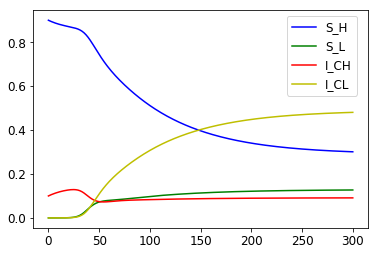

In [89]:

plt.plot(T, ANS['B'].values, 'b', label='yy')
plt.plot(T, ANS['C'].values, 'g', label='yy')
plt.plot(T, ANS['A'].values, 'r', label='yy')
plt.plot(T, ANS['D'].values, 'y', label='yy')

mpl.rcParams.update({'font.size': 12})

data_names = ['S_H', 'S_L', 'I_CH', 'I_CL']
plt.legend(
    bbox_to_anchor = (0.74, 0.58, 0.25, 0.25),
    loc = 'lower left', labels = data_names )